In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import OPTICS
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [10]:
# Load dataset
dataset = pd.read_csv('Mall_Customers.csv')

In [11]:
# Select features: Annual Income and Spending Score
X = dataset.iloc[:, 3:5].values

In [12]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Apply OPTICS
optics_model = OPTICS(min_samples=5, xi=0.05, metric='minkowski')
label = optics_model.fit_predict(X_scaled)

In [14]:
# Add cluster labels to the original dataset
supervised = pd.DataFrame(dataset)
supervised['Cluster_group'] = label

In [15]:
# Save clustered data
supervised.to_csv("optics_clusters.csv", index=False)

C:\Users\Priyan\anaconda3\envs\aiml\Lib\site-packages\seaborn\regression.py:598: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


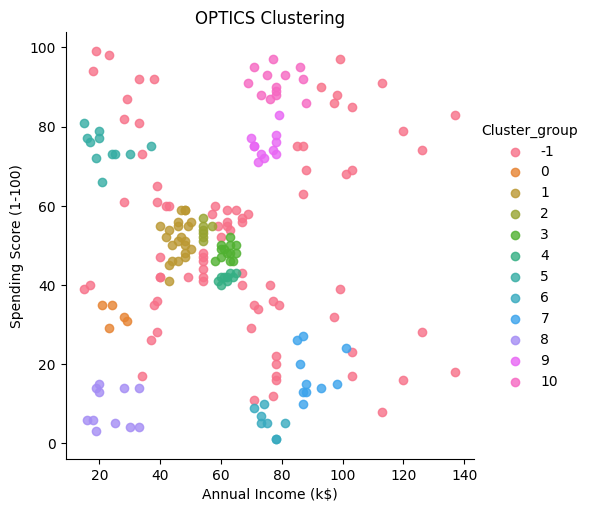

In [16]:
# Visualize clusters
sns.lmplot(data=supervised, 
           x=supervised.columns[3], 
           y=supervised.columns[4], 
           hue='Cluster_group', 
           fit_reg=False, 
           legend=True, 
           legend_out=True)

plt.title('OPTICS Clustering')
plt.show()

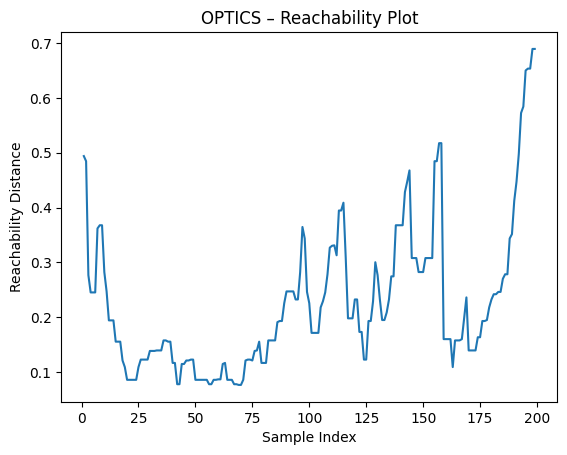

In [17]:
from sklearn.cluster import OPTICS

optics_model = OPTICS(min_samples=5, xi=0.05)
optics_model.fit(X_scaled)

plt.plot(optics_model.reachability_[optics_model.ordering_])
plt.title('OPTICS – Reachability Plot')
plt.xlabel('Sample Index')
plt.ylabel('Reachability Distance')
plt.show()